In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

In [2]:
%matplotlib inline

# imports
import numpy as np
import scipy as sp
import h5py
import matplotlib.pyplot as plt

import neurodsp as ndsp
from scv_funcs import lfpca
from scv_funcs import utils
import pandas as pd
import pandas.plotting as pdplt

CKEYS = plt.rcParams['axes.prop_cycle'].by_key()['color']
font = {'family' : 'arial',
        'weight' : 'regular',
        'size'   : 13}
import matplotlib
matplotlib.rc('font', **font)

import os
import json

/Users/rdgao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# load info file
infofile = '/Users/rdgao/Documents/data/CRCNS/hc3/sess_info.json'

# get info file
with open(infofile) as data_file:    
    info = json.load(data_file)
    
datafolder = '/Users/rdgao/Documents/data/CRCNS/hc3/'

In [4]:
num_sesh = len(info['sess'])
#for sesh in range(num_sesh)[12:13]:

sesh = 3
cur_dir = (datafolder+info['rat'][str(sesh)]+'/'+info['sess'][str(sesh)])    
cur_sesh = info['rat'][str(sesh)]+'_'+info['sess'][str(sesh)]
print(cur_sesh)

# get sampling rate & number of shanks    
fs = (float(info['Fs'][str(sesh)]))
num_shanks = len(next(os.walk(cur_dir))[1])
data_all = []        
# traverse through all shanks
for sh in range(num_shanks):
    print(sh, end=',')
    datafile = (cur_dir+'/'+str(sh)+'/lfp0.mat')
    with h5py.File(datafile, 'r') as file:
        data_all.append(np.array(file['lfp'][:,0]))

data = np.stack(data_all)

ec014_ec014.183
0,1,2,3,4,5,6,7,8,9,10,11,

In [5]:
analysis_param = {'nperseg': 1250,
                 'noverlap': 0,
                 'spg_outlierpct': 1.,
                 'max_freq':200}

# initialize object with data and parameters
hc3_lfpca = lfpca.LFPCA(analysis_param)
hc3_lfpca.populate_ts_data(data, fs) # take every 4th channel(2 per shank)

# compute all spectral attributes
hc3_lfpca.compute_all_spectral()

# compute KS-test fit against null exponential hypothesis
hc3_lfpca.compute_KS_expfit() # this takes a few minutes

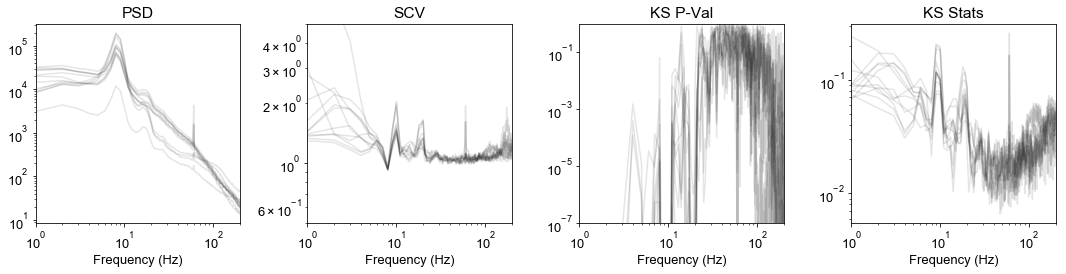

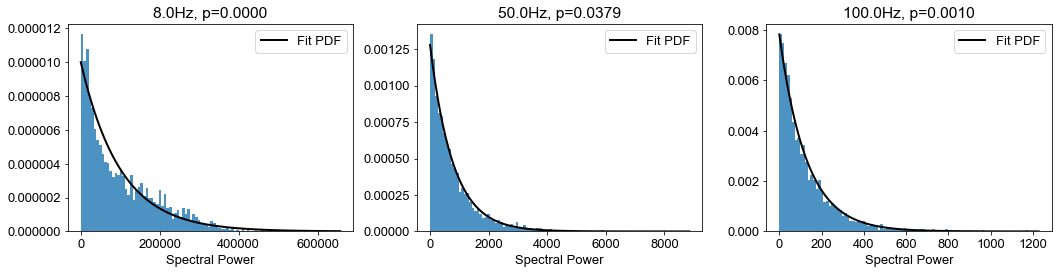

In [8]:
plot_chan = 0
plt.figure(figsize=(15,4))
hc3_lfpca.plot_spectral(plot_mean=False, plot_chan=None)

plot_freqs = [8,50,100]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    hc3_lfpca.plot_expfit(chan=plot_chan, freq_ind=f, plot_cdf=False)

plt.tight_layout()

/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


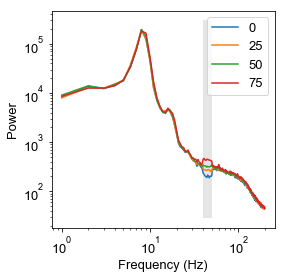

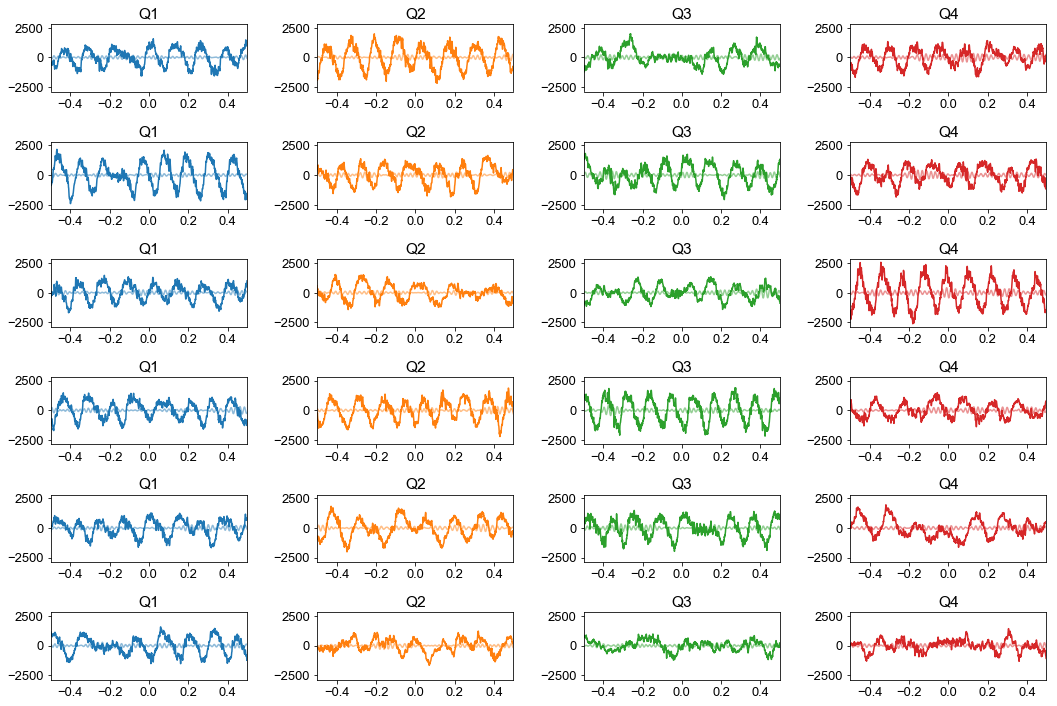

In [180]:
plot_chan = 9
rank_freqs = (40,50) #(70,100)

plt.figure(figsize=(4,4))
pwr_dgt, power_binned = utils.percentile_spectrogram(hc3_lfpca.spg[plot_chan,:,:], hc3_lfpca.f_axis, rank_freqs=rank_freqs, pct=range(0,100,25))
plt.figure(figsize=(15,10))

t_good = hc3_lfpca.t_axis[list(set(np.arange(len(hc3_lfpca.t_axis)))-set(hc3_lfpca.outlier_inds[plot_chan,:]))]
utils.plot_power_examples(hc3_lfpca.data[plot_chan,:], hc3_lfpca.fs, t_good, pwr_dgt, rank_freqs, N_cycles=7, power_adj=2)

